# SI 618 Day 10: Clustering

Version 2021.03.28.1.CT

# Clustering

## A few words about pipelines

Consider the following pipeline:

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])

The pipeline can be queried by using `get_params()`:

In [4]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [5]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [6]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [7]:
pipe.named_steps.pca.n_components=3

In [8]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

And you can also use the <estimator>__<parameter> syntax:


In [9]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Ok, on to today's notebook, which consists of two tasks.  First, let's load the music data we generated in an earlier class:

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
# let's use these imports to make life easier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv')

In [13]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8
1,Taylor F.,8,6,5,5,10,6,4,9,8,10
2,Briana W,6,3,2,3,2,10,7,6,8,9
3,Katie H.,3,5,6,5,6,8,2,9,9,10
4,N8 May,4,5,2,10,2,8,3,4,6,8


## Task
Create a feature matrix and a labels matrix from the music dataframe.  Assign them to `X` and `y`, respectively (note the use of uppercase X and lowercase y).

In [14]:
# Insert your code here
X = music.drop(columns="Name")
y = music[['Name']]

## Task

Create a pipeline that does the following:

1. Fills NA values with 1
2. Scales each variable to mean=0 and variance=1
3. Uses PCA to reduce the number of dimensions to 5; make sure you set random_state to some constant to allow you to reproduce your results
4. Uses the PCA projections (i.e. the transformed X matrix) as input to agglomerative clustering

Report the percent variance that is retained in the 5-dimensional PCA.

Use the output from the pipeline to create a visualization of the resulting clustering (i.e. create a dendrogram).  Annotate the visulization with a horizontal line that "cuts" the tree at a reasonable level and provide a written summary of each cluster's membership.  Save the resulting dendrogram to a PDF file called 'music_clusters.pdf' (hint: use `plt.savefig()`)

In [15]:
# Insert your code here
music.info()

pipe = Pipeline([
    ('fill1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
    ('cluster', AgglomerativeClustering(n_clusters=3)),
])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        60 non-null     object
 1   Blues       60 non-null     int64 
 2   Classical   60 non-null     int64 
 3   Country     60 non-null     int64 
 4   Electronic  60 non-null     int64 
 5   Folk        60 non-null     int64 
 6   Hip Hop     60 non-null     int64 
 7   Jazz        60 non-null     int64 
 8   Latin       60 non-null     int64 
 9   Pop         60 non-null     int64 
 10  Rock        60 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 5.3+ KB


In [16]:
y_pred = pipe.fit_predict(X)
pd.concat([y, pd.DataFrame(y_pred)], axis=1).head()

,Name,0
0,Chris T,2
1,Taylor F.,1
2,Briana W,0
3,Katie H.,1
4,N8 May,0


In [17]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.7499460712836981

75% of the variance is maintained after the PCA  dimension reduction

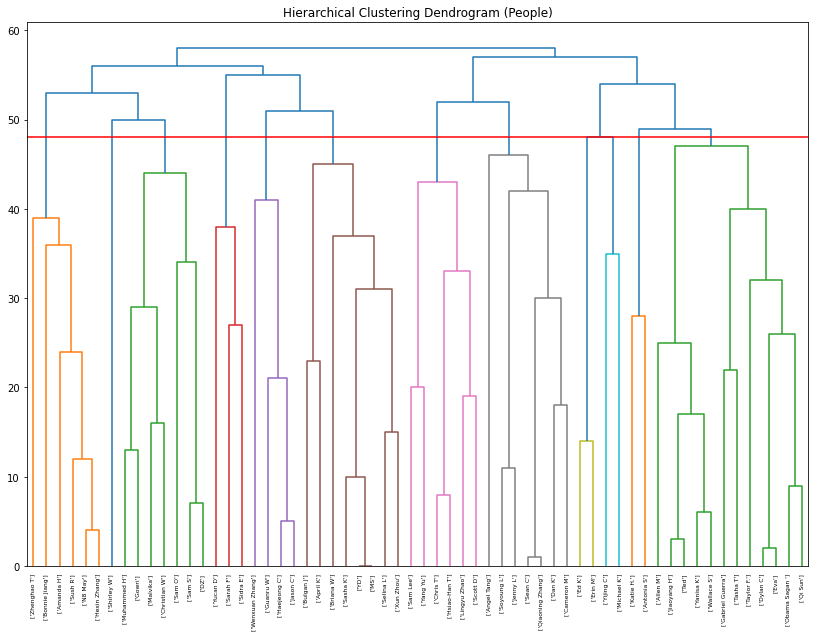

In [18]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(pipeline, **kwargs):

    # Children of hierarchical clustering
    children = pipeline.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    threshold = kwargs.pop('color_threshold')
    plt.axhline(threshold,color='red')

plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (People)')

plot_dendrogram(pipe,labels=y.values,color_threshold=48)
#plt.axhline(57.5,c='red')
plt.xticks(rotation=90)
plt.savefig('music_clusters.pdf')
plt.show()


## Task

Conduct a k-means clustering of the music data.  Preprocess the data by scaling it and performing a PCA and retaining 2 dimensions.  Use the PCA scores as input to the clustering. Use silhouette plots to determine the optimal number of clusters.  If time permits, experiment with changing the number of principal components.  Be sure to set your random_state to allow you to reproduce your results.

Note that you do not need to use a pipeline, although doing so may make your life easier.

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np

def plot_silhouettes(features, pipeline, cluster_list=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]):
    Xformed = pipeline.fit_transform(features)
    for n_clusters in cluster_list:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(Xformed) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 42 for reproducibility.
        
        pipeline.named_steps.cluster.set_params(n_clusters=n_clusters)
        clusterer = pipeline.named_steps.cluster
        cluster_labels = clusterer.fit_predict(features)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(Xformed, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(Xformed, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(Xformed[:, 0], Xformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k') #here 4

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3529611130878775
For n_clusters = 3 The average silhouette_score is : 0.18386597262801865
For n_clusters = 4 The average silhouette_score is : 0.07183254265088744
For n_clusters = 5 The average silhouette_score is : 0.014298544773353598
For n_clusters = 6 The average silhouette_score is : -0.06294606738924236
For n_clusters = 7 The average silhouette_score is : -0.0650654034049908
For n_clusters = 8 The average silhouette_score is : -0.10059713666181648
For n_clusters = 9 The average silhouette_score is : -0.14311487948200569
For n_clusters = 10 The average silhouette_score is : -0.14462302542898894
For n_clusters = 11 The average silhouette_score is : -0.2025406811387717
For n_clusters = 12 The average silhouette_score is : -0.17226359685538575
For n_clusters = 13 The average silhouette_score is : -0.1758921444625213
For n_clusters = 14 The average silhouette_score is : -0.2391439602929743
For n_clusters = 15 The average silhouett

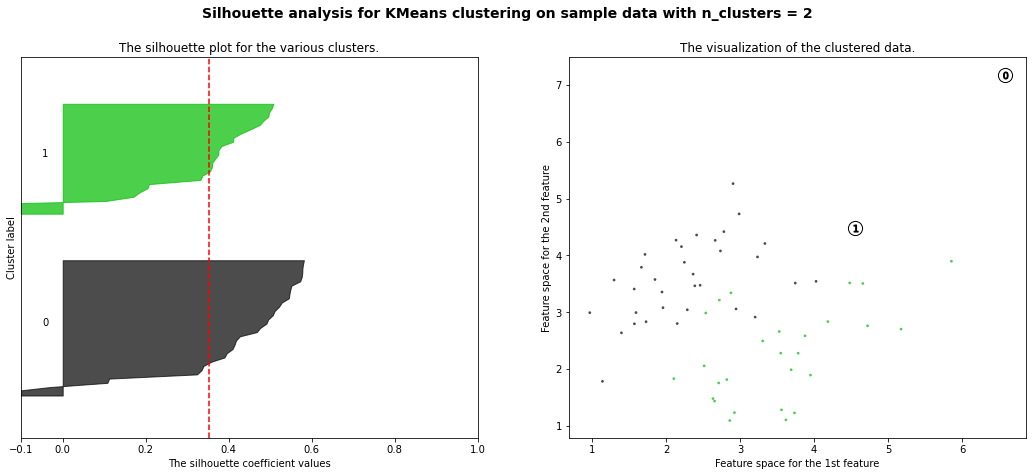

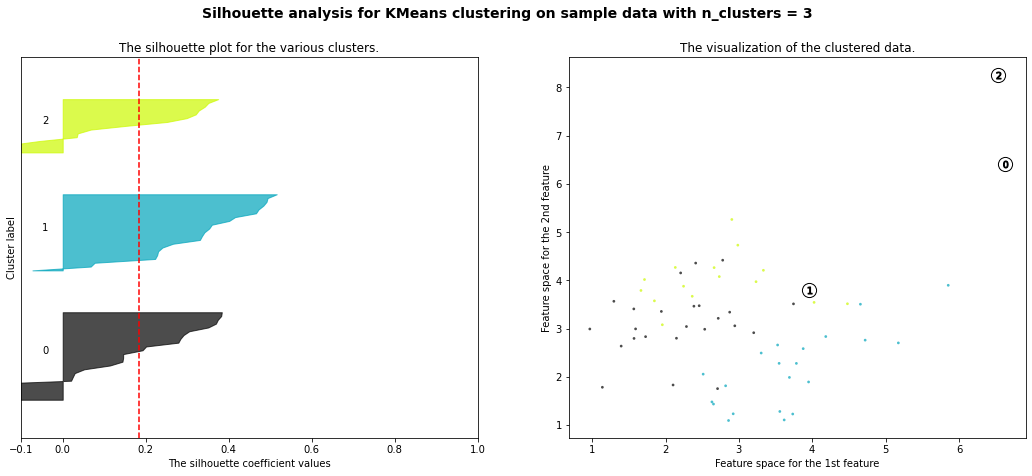

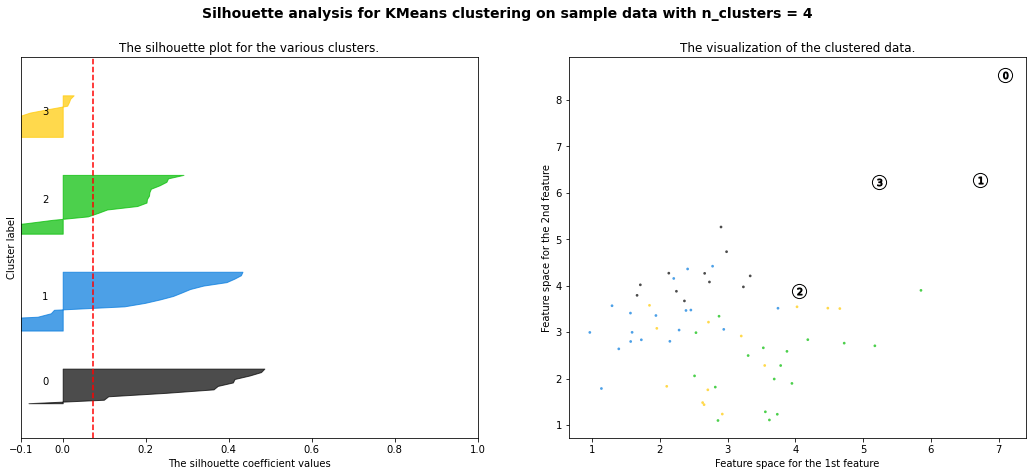

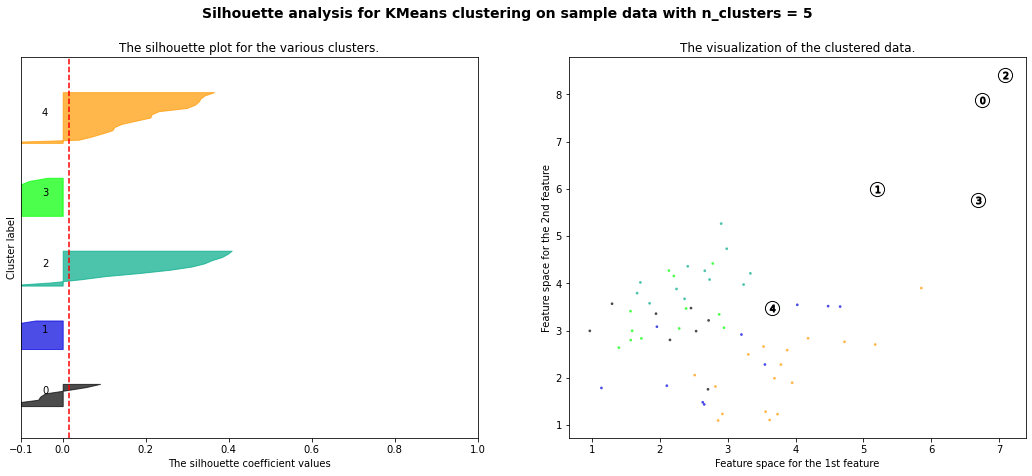

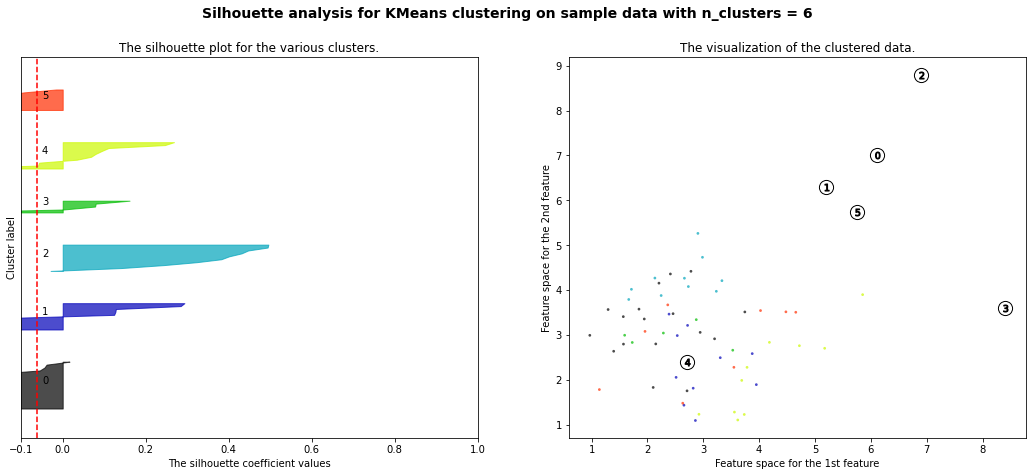

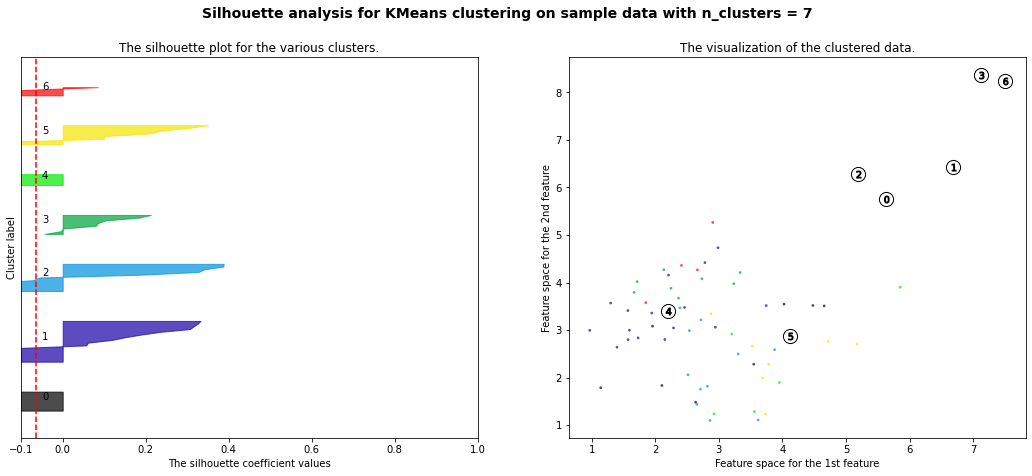

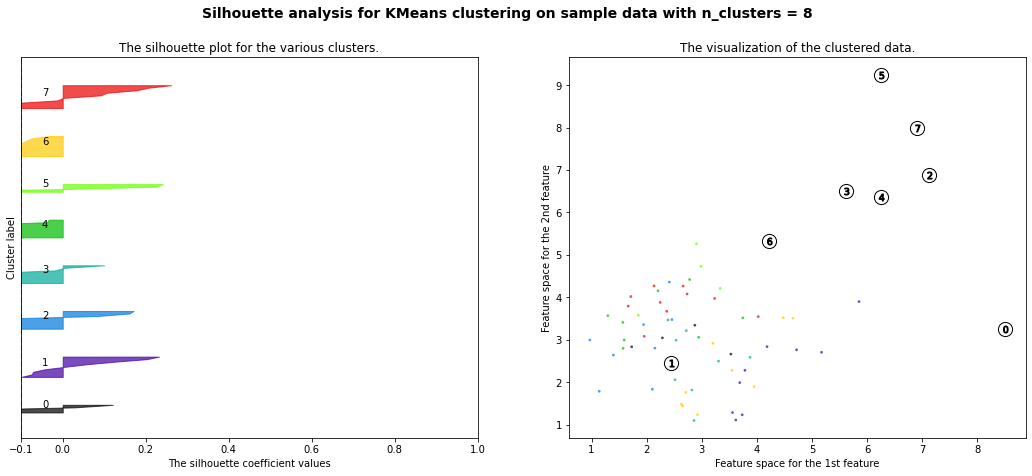

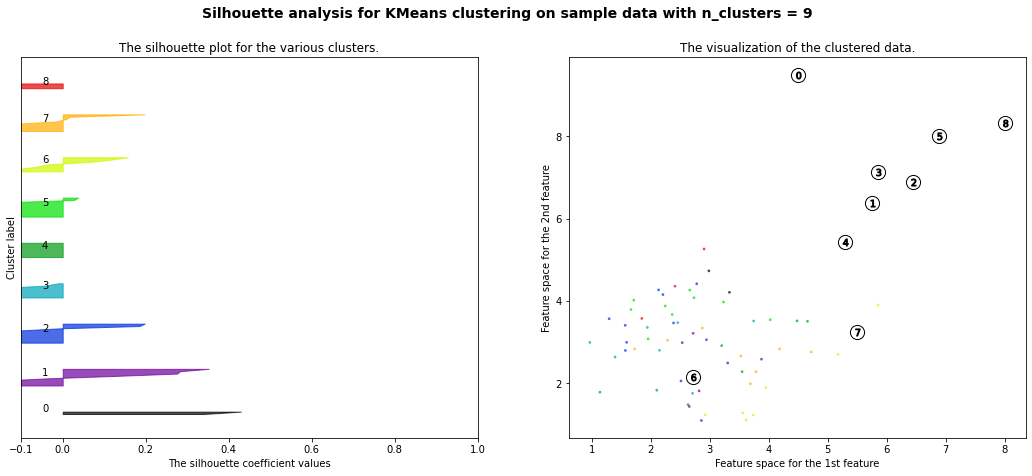

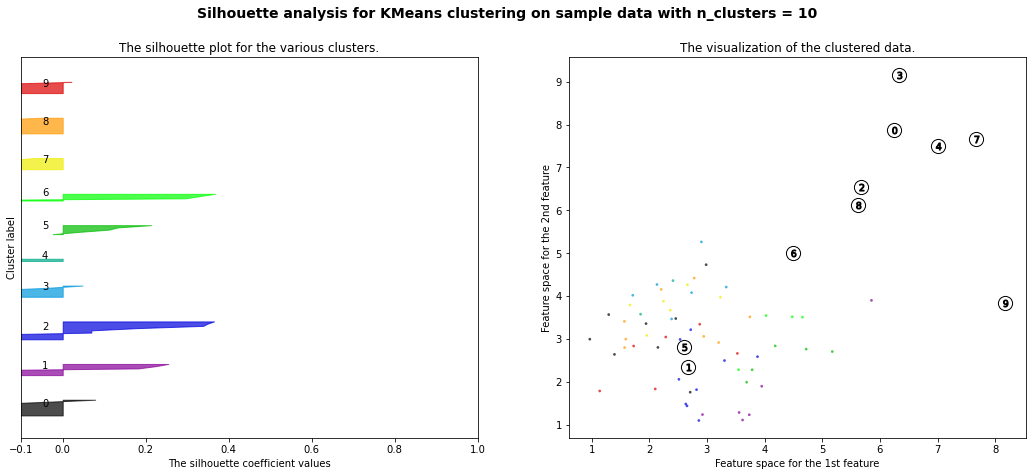

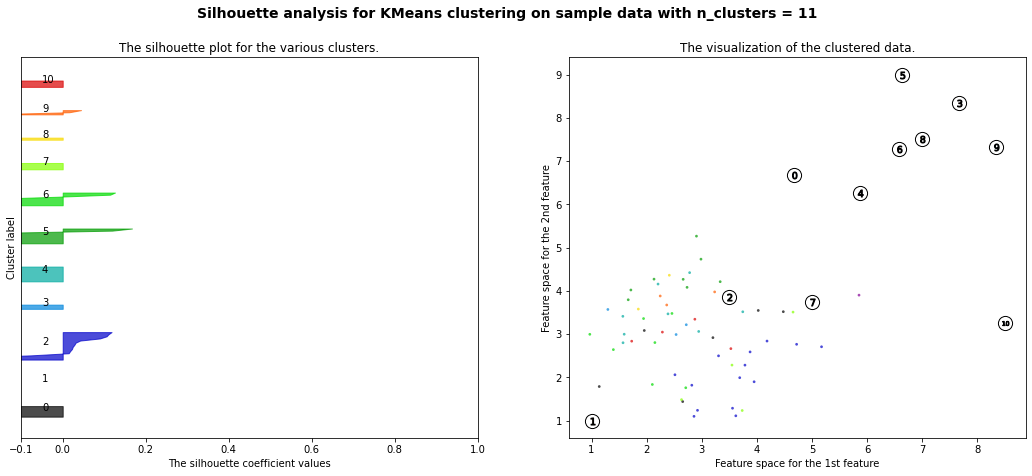

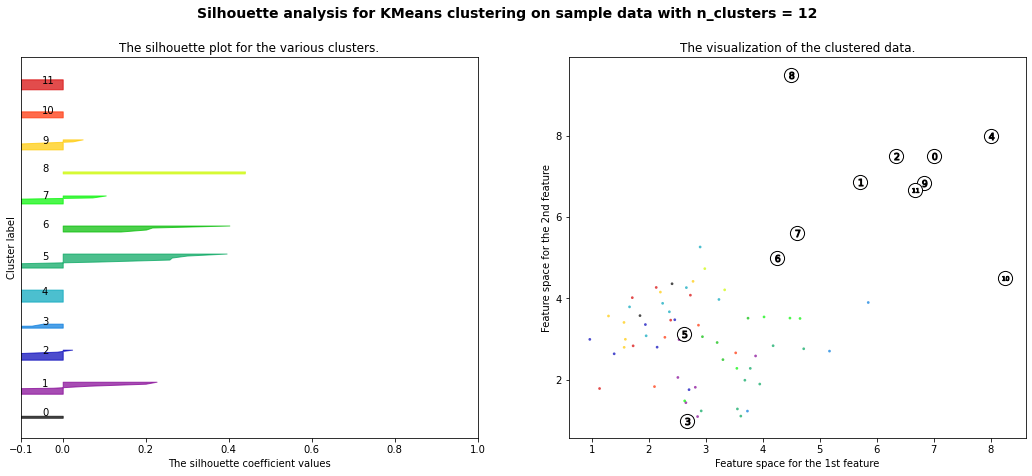

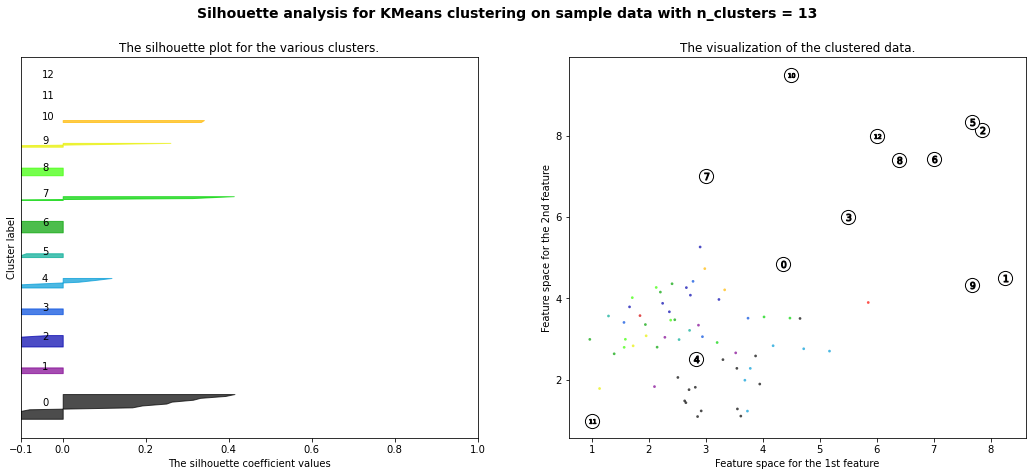

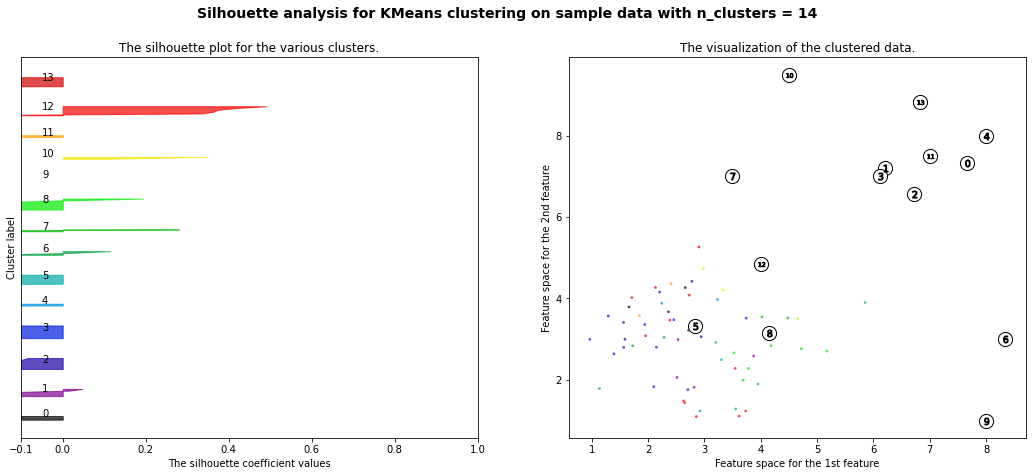

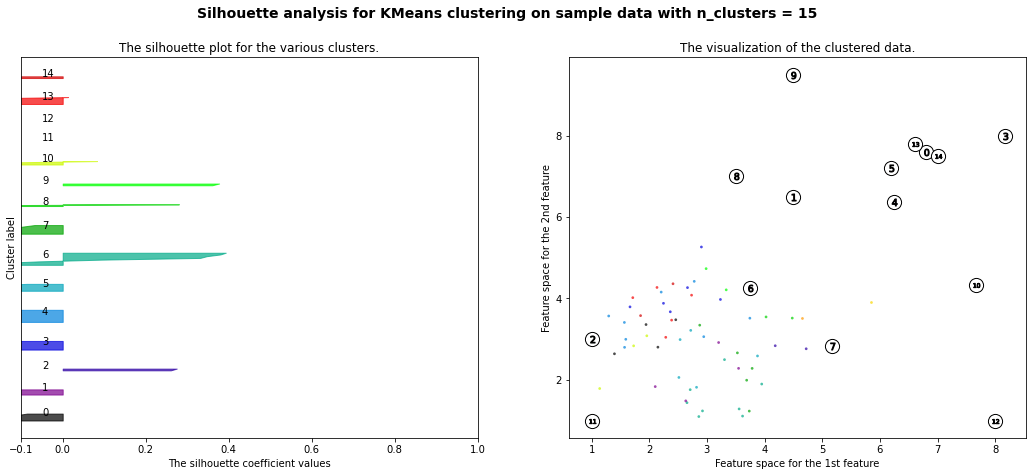

In [28]:
plot_silhouettes(X, Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
    ('cluster', KMeans(n_clusters=2)),
]))